# Laboratory #2_2 : Corner detection and ORB

At the end of this laboratory, you would get familiarized with

*   Corner Detection using FAST and Harris Corners
*   ORB feature detectors and descriptors

**Remember this is a graded exercise.**

*   For every plot, make sure you provide appropriate titles, axis labels, legends, wherever applicable.
*   Create reusable functions where ever possible, so that the code could be reused at different places.
*   Mount your drive to access the images.
*   Add sufficient comments and explanations wherever necessary.

---

In [2]:
# mount drive to the notebook

# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# Loading necessary libraries (Feel free to add new libraries if you need for any computation)

import numpy as np
from matplotlib import pyplot as plt
import os
from skimage import color, data, feature, filters, io, transform 

# Corner Detection

### Exercise: #1

*    Detect the corners in the image starbucks4.jpg. Use corner_fast to extract FAST corners for the given image and corner_peaks to find corners in the corner measure response image.
*   Show the original image, fast corners, peaks overlayed on the original image using matplotlib subplot.



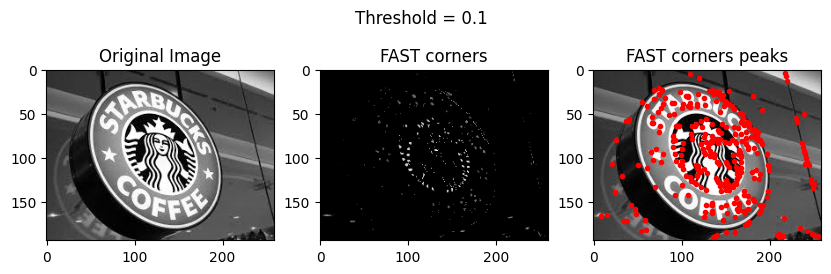

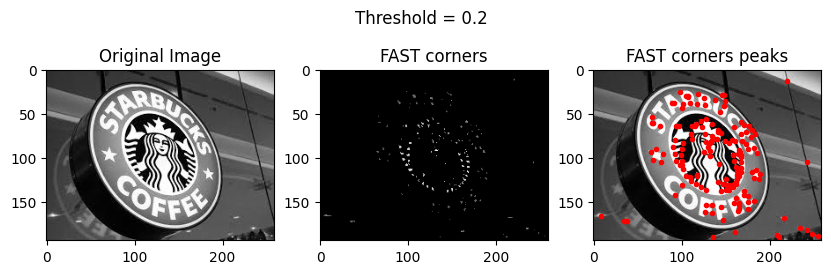

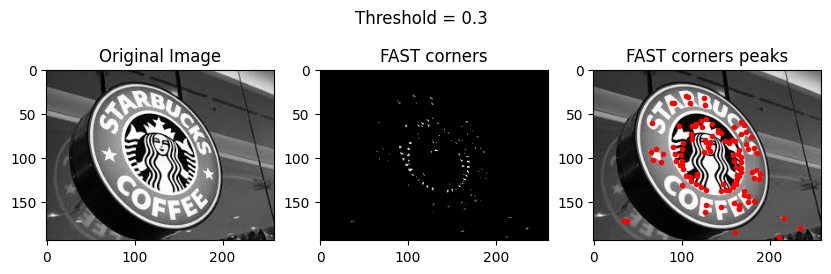

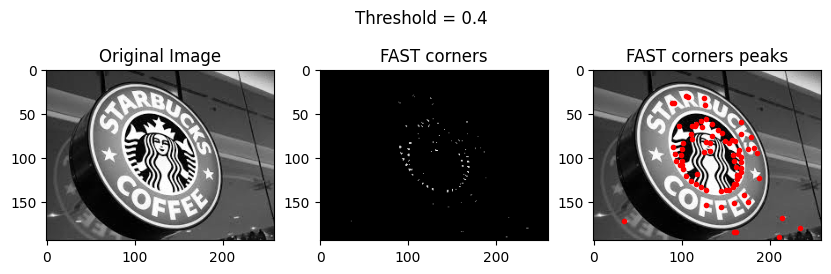

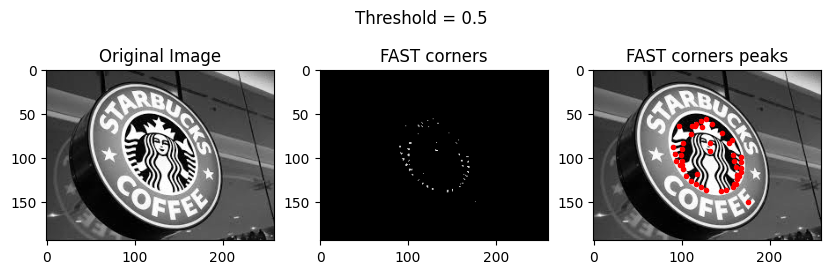

In [4]:
# solution

# *    Detect the corners in the image starbucks4.jpg. 
# Use corner_fast to extract FAST corners for the given image and 
# corner_peaks to find corners in the corner measure response image.

image = io.imread('images/starbucks/starbucks4.jpg')
image = color.rgb2gray(image)

ls_thresh = [0.1, 0.2, 0.3, 0.4, 0.5]

for thresh in ls_thresh:
    fast_corners = feature.corner_fast(image, threshold=thresh)
    fast_corners_peaks = feature.corner_peaks(fast_corners, min_distance=1)
    # *   Show the original image, fast corners, peaks overlayed on the original image using matplotlib subplot.
    plt.figure(figsize=(10,3))
    plt.subplot(1,3,1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.subplot(1,3,2)
    plt.imshow(fast_corners, cmap='gray')
    plt.title('FAST corners')
    plt.subplot(1,3,3)
    plt.imshow(image, cmap='gray')
    plt.plot(fast_corners_peaks[:,1], fast_corners_peaks[:,0], 'r.')
    plt.title('FAST corners peaks')
    plt.suptitle('Threshold = ' + str(thresh))
    plt.show()


*   Analyze and discuss the effect of changing **'threshold'** in the corner_fast function.

**Solution**

The threshold parameter in the corner_fast function is used to set the threshold for the corner detection. The threshold value is inversely proportional to the number of corners detected. The higher the threshold, the lesser the number of corners detected. The lower the threshold, the more the number of corners detected.

*   Repeat the exercise by replacing FAST corners with Harris corners.

In the case of Harris corner detector, there are 3 parameters which can be tuned. To understand them better, we will enumerate the steps of Harris corner detection algorithm:

1. Apply gaussian filter to the image to remove noise. -> parameter: **sigma**
2. Compute the x and y derivatives of the image.
3. Calculate the auto-correlation matrix M for each pixel.
$$
M = \sum_{x,y} w(x,y) \begin{bmatrix} I_x^2 & I_xI_y \\ I_xI_y & I_y^2 \end{bmatrix}
$$
where $I_x$ and $I_y$ are the derivatives of the image in x and y directions respectively and $w(x,y)$ is the gaussian window.
4. Compute the corner response function for each pixel. -> parameter: **k**
$$
f = det(M) - k(trace(M))^2
$$
where $k$ is an empirically determined constant in the range $[0, 0.2]$

Another way to compute the corner response function is: -> parameter: **eps**
$$
f = \frac{det(M)}{trace(M) + \epsilon}
$$
where $\epsilon$ is a small constant to avoid division by zero.
5. Threshold the corner response function to obtain the corner map.
6. Perform non-maximum suppression (NMS) on the corner map to obtain the final corners.

NMS is performed by considering a window of size $3 \times 3$ around each pixel. The pixel with the maximum value in the window is considered as the corner and the rest are suppressed.

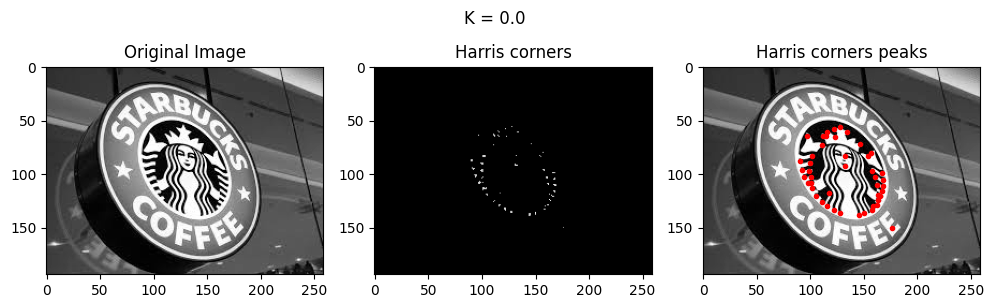

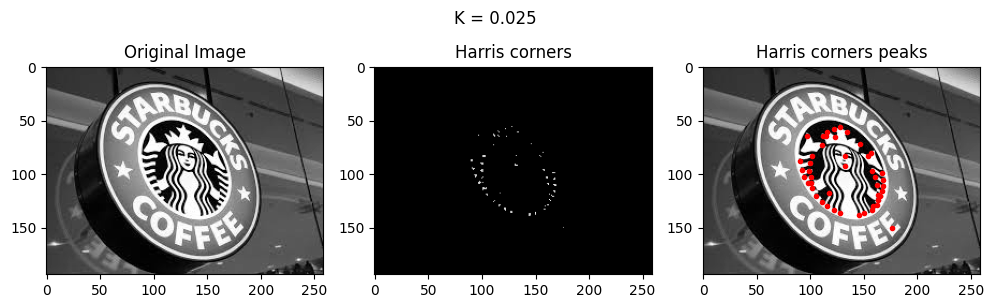

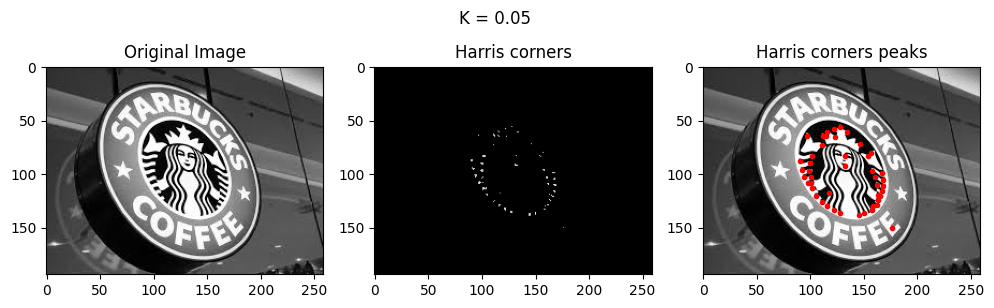

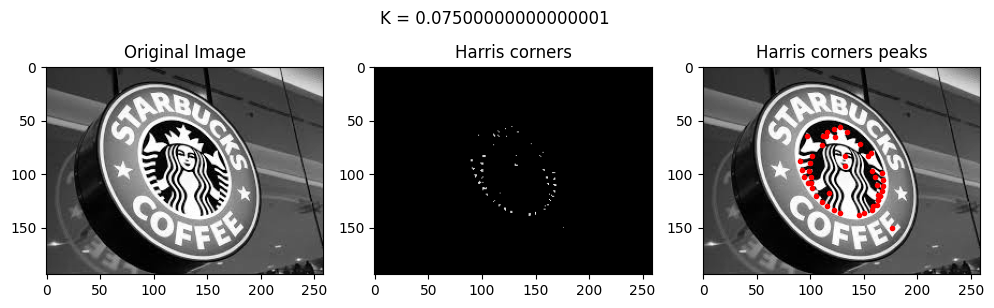

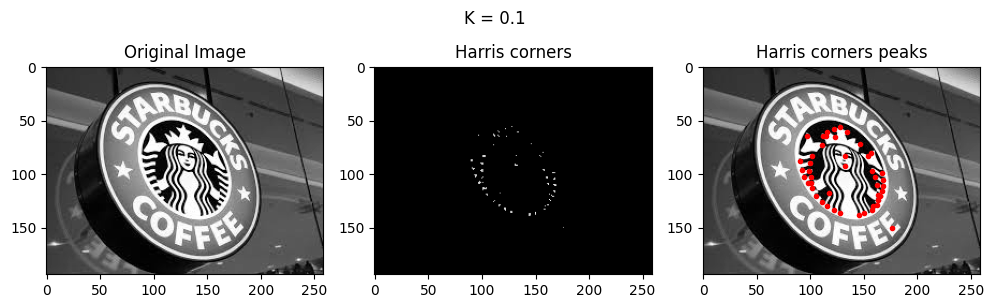

In [9]:
# Modify k to see if there's any change in the number of corners detected.

image = io.imread('images/starbucks/starbucks4.jpg')
image = color.rgb2gray(image)

ls_k= np.linspace(0., 0.1, 5)

for k in ls_k:
    corner_harris = feature.corner_harris(image, k=k)
    harris_corners_peaks = feature.corner_peaks(fast_corners, min_distance=1)
    # *   Show the original image, fast corners, peaks overlayed on the original image using matplotlib subplot.
    plt.figure(figsize=(10,3))
    plt.subplot(1,3,1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.subplot(1,3,2)
    plt.imshow(fast_corners, cmap='gray')
    plt.title('Harris corners')
    plt.subplot(1,3,3)
    plt.imshow(image, cmap='gray')
    plt.plot(harris_corners_peaks[:,1], harris_corners_peaks[:,0], 'r.')
    plt.title('Harris corners peaks')
    plt.suptitle('K = ' + str(k))
    plt.tight_layout()
    plt.show()


*   Do you find difference between both the techniques? If so, why and what difference do you observe?

**Solution**

- FAST corners are more sensitive to noise than Harris corners but it is also faster.
- Harris corners, as it is based on a more stringent criteria, shows less number of corners than FAST corners.
- FAST corners is more sensitive to threshold variations. We have seen that modifying the threshold value in FAST corners has a significant effect on the number of corners detected. In the case of Harris corners, the number of corners detected is not very sensitive to the k value.

# ORB feature detector and binary descriptor

### Exercise #0: Compute ORB descriptors and find descriptors match

*   Load 'astronaut' image from data module.
*   Convert the image to grayscale.
*   Create a copy of the image and rotate it by 180&deg; 



In [11]:
img1 = color.rgb2gray(data.astronaut())
img2 = transform.rotate(img1, 180)

*   Create an ORB feature detector with default parameters. *Hint: ORB feature detector is available in skimage.feature module.*



In [12]:
descriptor_extractor = feature.ORB(n_keypoints=200)

*   Extract the keypoints and descriptors using detect_and_extract function for both the images

In [13]:
descriptor_extractor.detect_and_extract(img1)
keypoints1 = descriptor_extractor.keypoints
descriptors1 = descriptor_extractor.descriptors

descriptor_extractor.detect_and_extract(img2)
keypoints2 = descriptor_extractor.keypoints
descriptors2 = descriptor_extractor.descriptors

*   Descriptors can be matched using match_descriptors function available in skimage.feature module
*   The matches can be plotted using the plot_matches function available in skimage.feature module

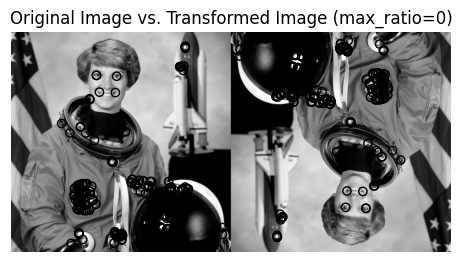

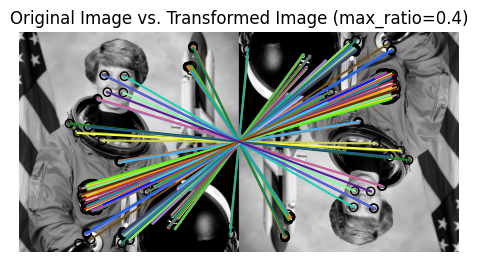

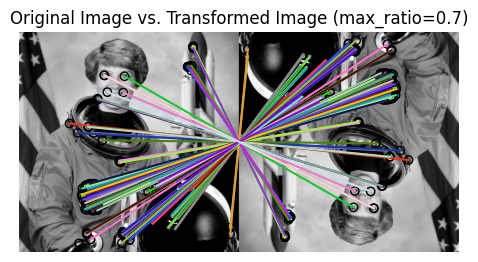

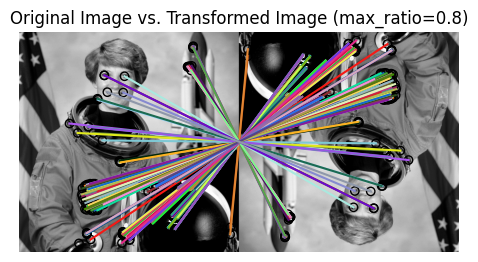

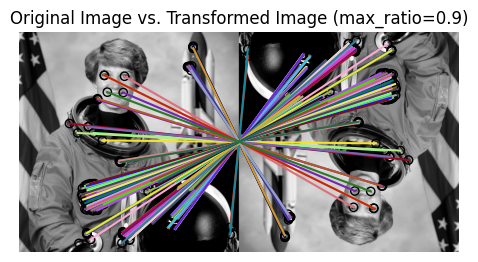

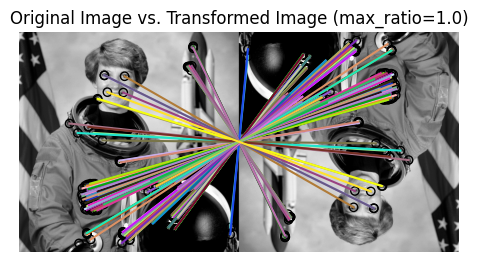

In [79]:
ls_ratios = [0, 0.4, 0.7, 0.8, 0.9, 1.]

for i, ratio in enumerate(ls_ratios):
    plt.figure(figsize=(20,20))
    plt.subplot(len(ls_ratios),1,i+1)
    matches12 = feature.match_descriptors(descriptors1, descriptors2, cross_check=True, max_ratio=ratio)
    feature.plot_matches(plt, img1, img2, keypoints1, keypoints2, matches12)
    plt.axis('off')
    plt.title(f"Original Image vs. Transformed Image (max_ratio={ratio})")
    plt.show()

### Exercise: #1

*   Analyze and discuss the effect of changing the parameter **'max_ratio'** in the match_descriptors function.

**Solution**

Maximum ratio of distances between first and second closest descriptor in the second set of descriptors. This threshold is useful to filter ambiguous matches between the two descriptor sets. The choice of this value depends on the statistics of the chosen descriptor, e.g., for SIFT descriptors a value of 0.8 is usually chosen.

In the example above, no difference can be seen in the matches when the max_ratio is changed from 1 to 0.5. This is because the descriptors are very different from each other and hence the ratio of distances between the first and second closest descriptors is very high.

In theory, if the descriptors are similar to each other, then the number of matches will decrease as the max_ratio is decreased. In case of max_ratio = 0, only the descriptors which are exactly the same will be matched (d1 = 0). In case of max_ratio = 1, all the descriptors will be matched (d1 = d2).

*   What do you infer from **'harris_k'**, **'n_scales'**, **'fast_n'**, **'fast_threshold'** parameters in ORB function?

**Solution**

skimage.feature.ORB documentation says:

- fast_n : The n parameter in skimage.feature.corner_fast. Minimum number of consecutive pixels out of 16 pixels on the circle that should all be either brighter or darker w.r.t test-pixel. A point c on the circle is darker w.r.t test pixel p if Ic < Ip threshold and brighter if Ic > Ip + threshold. Also stands for the n in FAST-n corner detector.

- fast_threshold : float, optional. The threshold parameter in feature.corner_fast. Threshold used to decide whether the pixels on the circle are brighter, darker or similar w.r.t. the test pixel. Decrease the threshold when more corners are desired and vice-versa.

- harris_k : float, optional. The k parameter in skimage.feature.corner_harris. Sensitivity factor to separate corners from edges, typically in range [0, 0.2]. Small values of k result in detection of sharp corners.

- n_scales : int, optional. Maximum number of scales from the bottom of the image pyramid to extract the features from.



1. As its is known, ORB uses FAST corner detector, harris cornerness measure, SIFT scale invariance and intensity centroids. The parameters mentioned above are used to tune the FAST corner detector and harris cornerness measure.

2. fast_n and fast_threshold are used to tune the FAST corner detector. They measure the size of the circular area that should be brighter or darker than the test one. Fast thershold is used to decide if the corner factor is big enough to consider it a corner.

3. harris_k is used to tune the harris cornerness measure. It is used to separate corners from edges. Small values of k result in detection of sharp corners.

4. n_scales is used to tune the SIFT scale invariance. It is used to extract the features from the bottom of the image pyramid.

### Exercise: #2
*   Using the above example, create a function get_ORB, that takes two images as parameters and returns the keypoints of both images and descriptor matches

In [88]:
# solution

def get_ORB(img1, img2, **kwargs):
    descriptor_extractor = feature.ORB(n_keypoints=200, **kwargs)
    descriptor_extractor.detect_and_extract(img1)
    keypoints1 = descriptor_extractor.keypoints
    descriptors1 = descriptor_extractor.descriptors

    descriptor_extractor.detect_and_extract(img2)
    keypoints2 = descriptor_extractor.keypoints
    descriptors2 = descriptor_extractor.descriptors

    matches12 = feature.match_descriptors(descriptors1, descriptors2, cross_check=True)
    
    return keypoints1, keypoints2, matches12

*   Using the above function, detect the correspondences between the model image 'starbucks.jpg' with the scene image 'starbucks4.jpg'
*   Plot the matches between the two images.

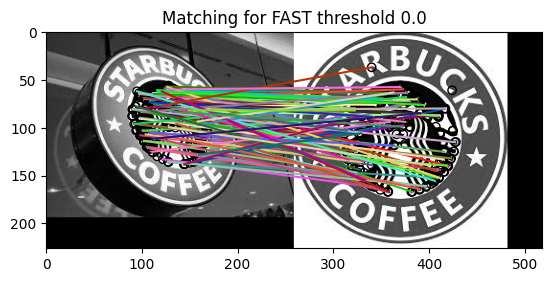

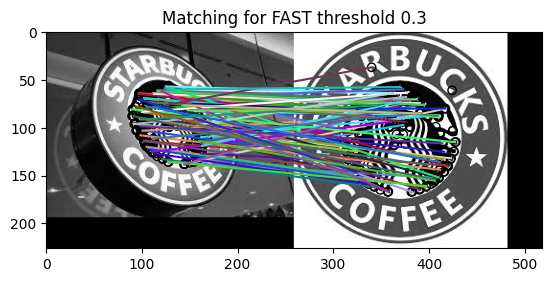

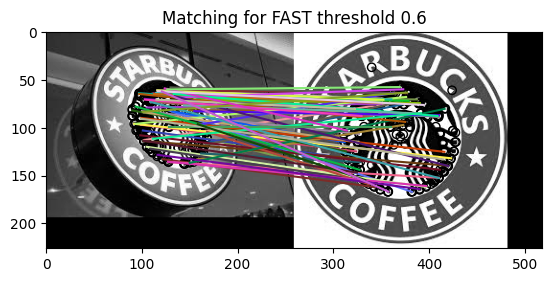

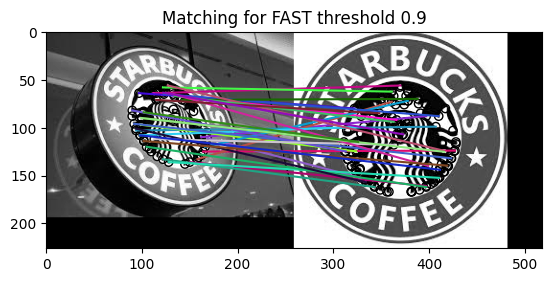

In [93]:
# solution

img1 = io.imread('images/starbucks/starbucks4.jpg')
img1 = color.rgb2gray(img1)

img2 = io.imread('images/starbucks/starbucks.jpg')
img2 = color.rgb2gray(img2)

ls_thresh = np.linspace(0., .9, 4)
for thresh in ls_thresh:
    kp1, kp2, match12 = get_ORB(img1, img2, fast_threshold=thresh)

    fig, ax = plt.subplots(1, 1)
    feature.plot_matches(ax, img1, img2, kp1, kp2, match12)
    ax.set_title(f"Matching for FAST threshold {thresh}")
    plt.show()

It is important to adjust the detector threshold so that only real keypoints are use for matching and noise is avoided. In the examples above, until 0.6, some parts of letters are considered keypoints. This is fixed in the 0.9 case.

### Exercise: #3

*   Using "starbucks.jpg" image as a model, show its matches to all Starbucks images. 
*   Show the number of the matches for the pair as title for each plot.

In [ ]:
# solution



*   Comment on the performance of the algorithm with respect to each image. When do you think the algorithm works better?

**Solution**

*(Double-click or enter to edit)*

...

### Exercise: #4

*   Repeate **Exercise #2**, by changing the orientation of the model image by rotating it and comparing it with its original version.
*   Create 8 orientations of the model image by rotating the image by 45&deg; (0, 45, 90, 135, 180, 225, 270, 315). *Hint: You can use the rotate() function from skimage.transform.*

In [ ]:
# solution



*   What do you observe with respect to the change in orientations?

**Solution**

*(Double-click or enter to edit)*

...

### Exercise: #5

*   Repeat **Exercise #3** using Coco-cola images using cocacola_logo.png as the model image.
*   Does the same parameters used for Starbucks images work in this case? Or was it necessary to modify the ORB parameters?

In [ ]:
# solution



**Solution**

*(Double-click or enter to edit)*

...

### Exercise #6. Analysis of the applied techniques and results

*   What are the advantages of ORB object detection compared with HOG object detector?

**Solution**

*(Double-click or enter to edit)*

...

*   What would happen if you analyse an image that does not contain the Starbucks logo (as is the case of "edificio.jpg")?

In [ ]:
# solution



**Solution**

*(Double-click or enter to edit)*

...

*   What are the different ways of defining a quality measure for the correspondance between two images? (implementation of measures is not necessary)?

**Solution**

*(Double-click or enter to edit)*

...

# Panorama Stitching (Not graded)

Image Mosaicing is a technique of combining multiple overlapping images into a single image.

*   A simple tutorial can be found in this notebook: 
*   https://github.com/scikit-image/skimage-tutorials/blob/main/lectures/solutions/adv3_panorama-stitching-solution.ipynb


---

## **End of P2_2: Corner Detection and ORB**
Deadline for P2_2 submission in CampusVirtual is: **6th of Novembre, 2023**
